```jsx
import { deleteDoc, getFirestore, doc, updateDoc } from 'firebase/firestore';

const onDelete = async (event) => {
const ok = window.confirm('삭제 하시겠습니까?');
if (ok) {
// implement delete function
console.log(tweetObj.id);
// doc("컬렉션이름", "문서이름")
await deleteDoc(doc(getFirestore(), 'tweets', tweetObj.id));
}
};
```

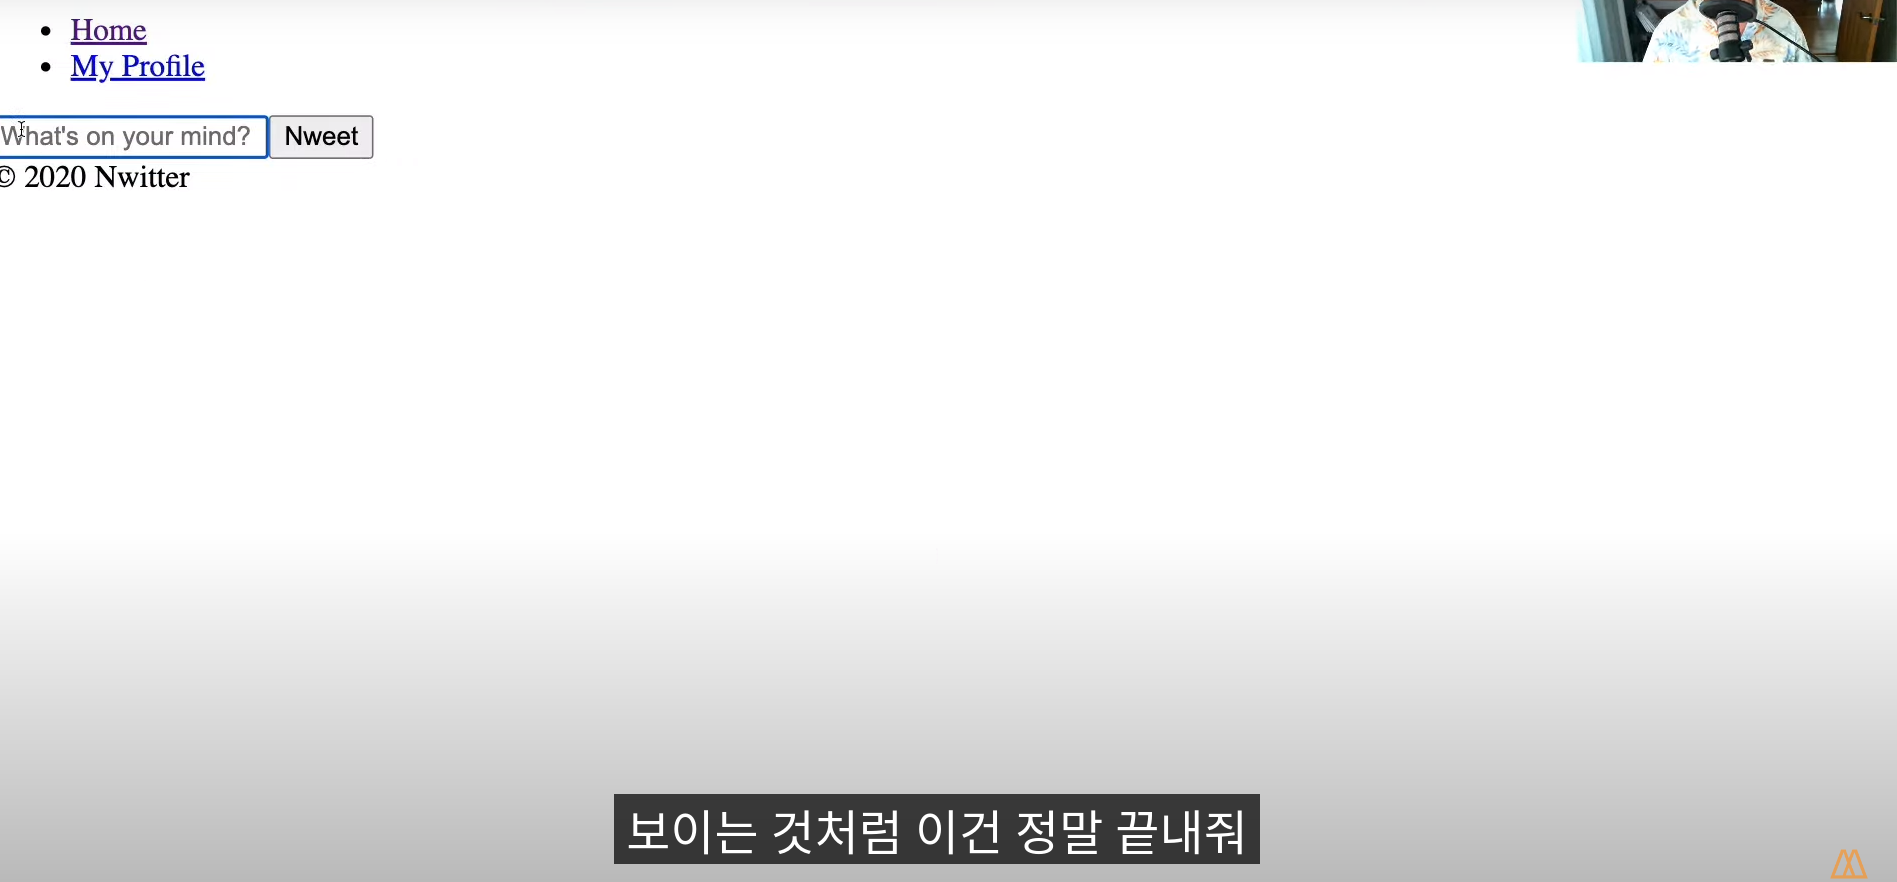

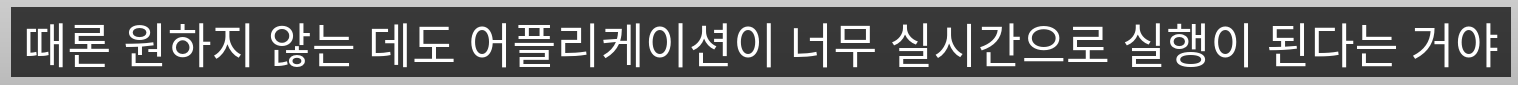

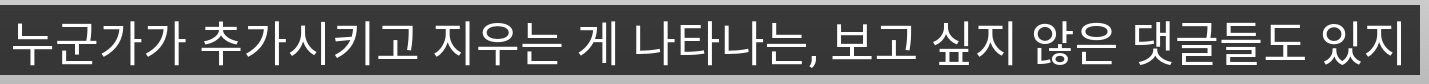

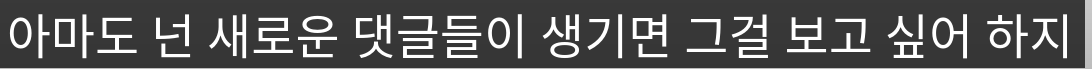

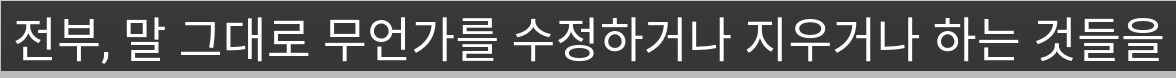

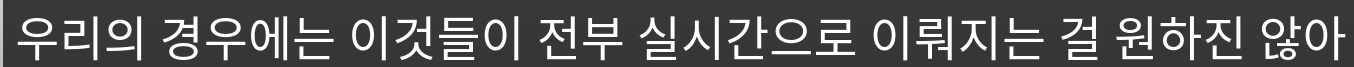

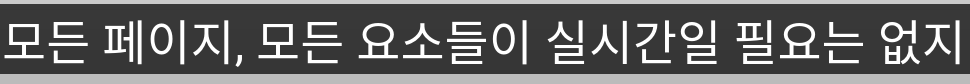

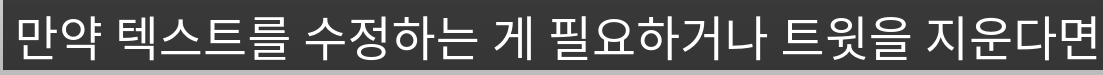

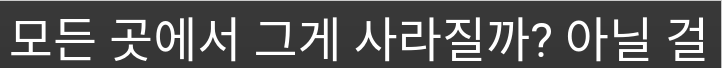

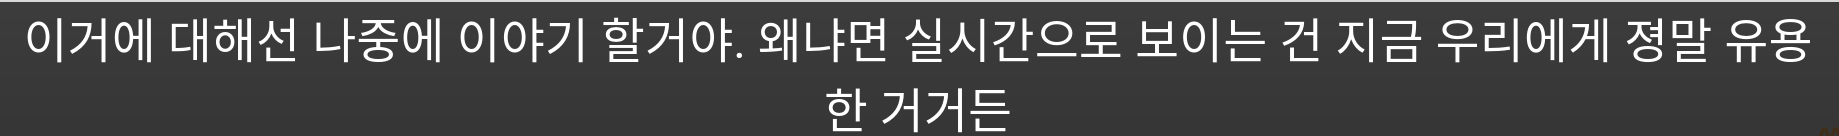

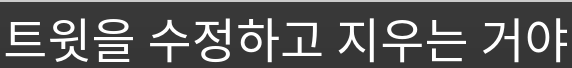

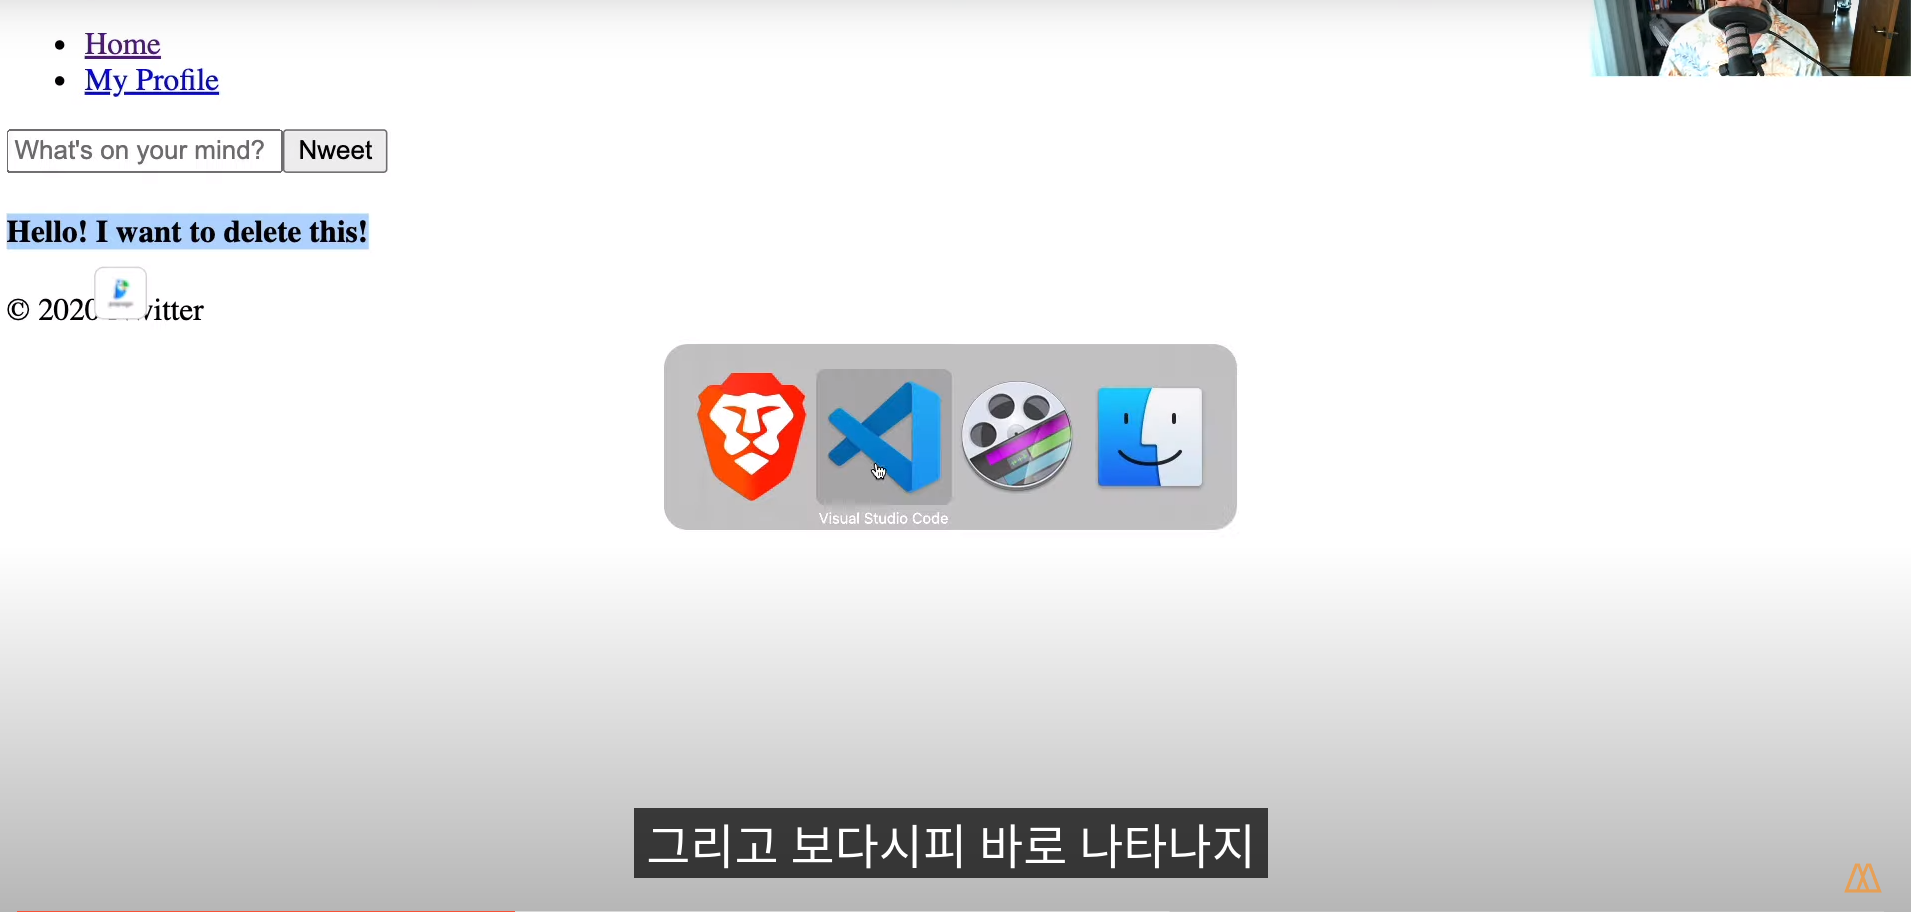

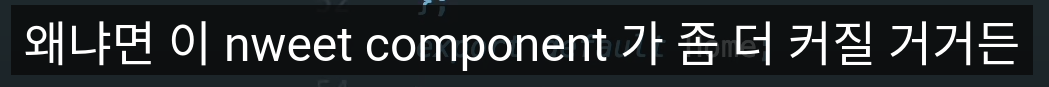

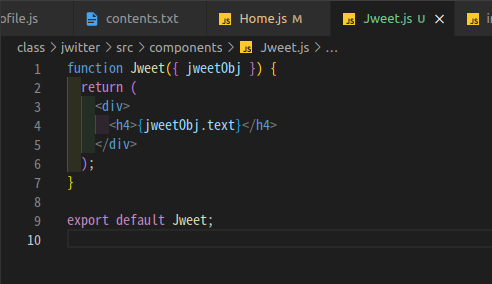

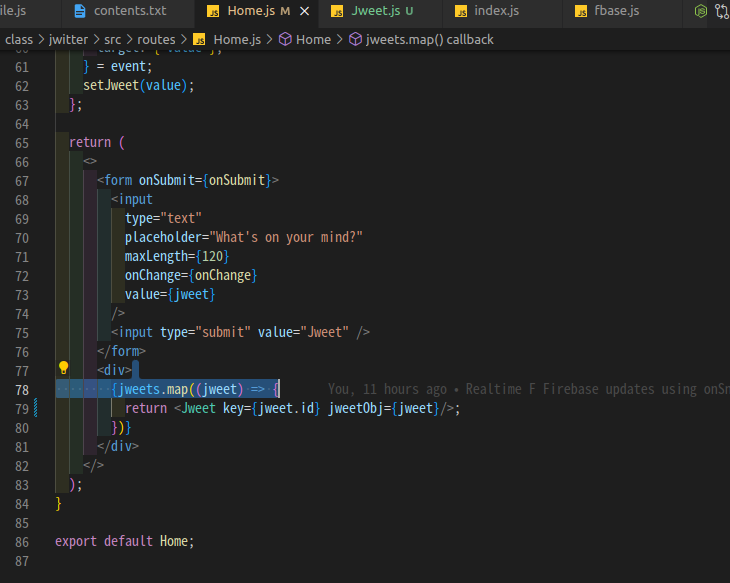

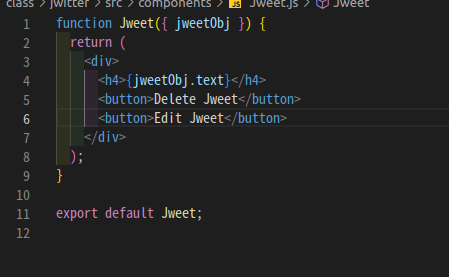

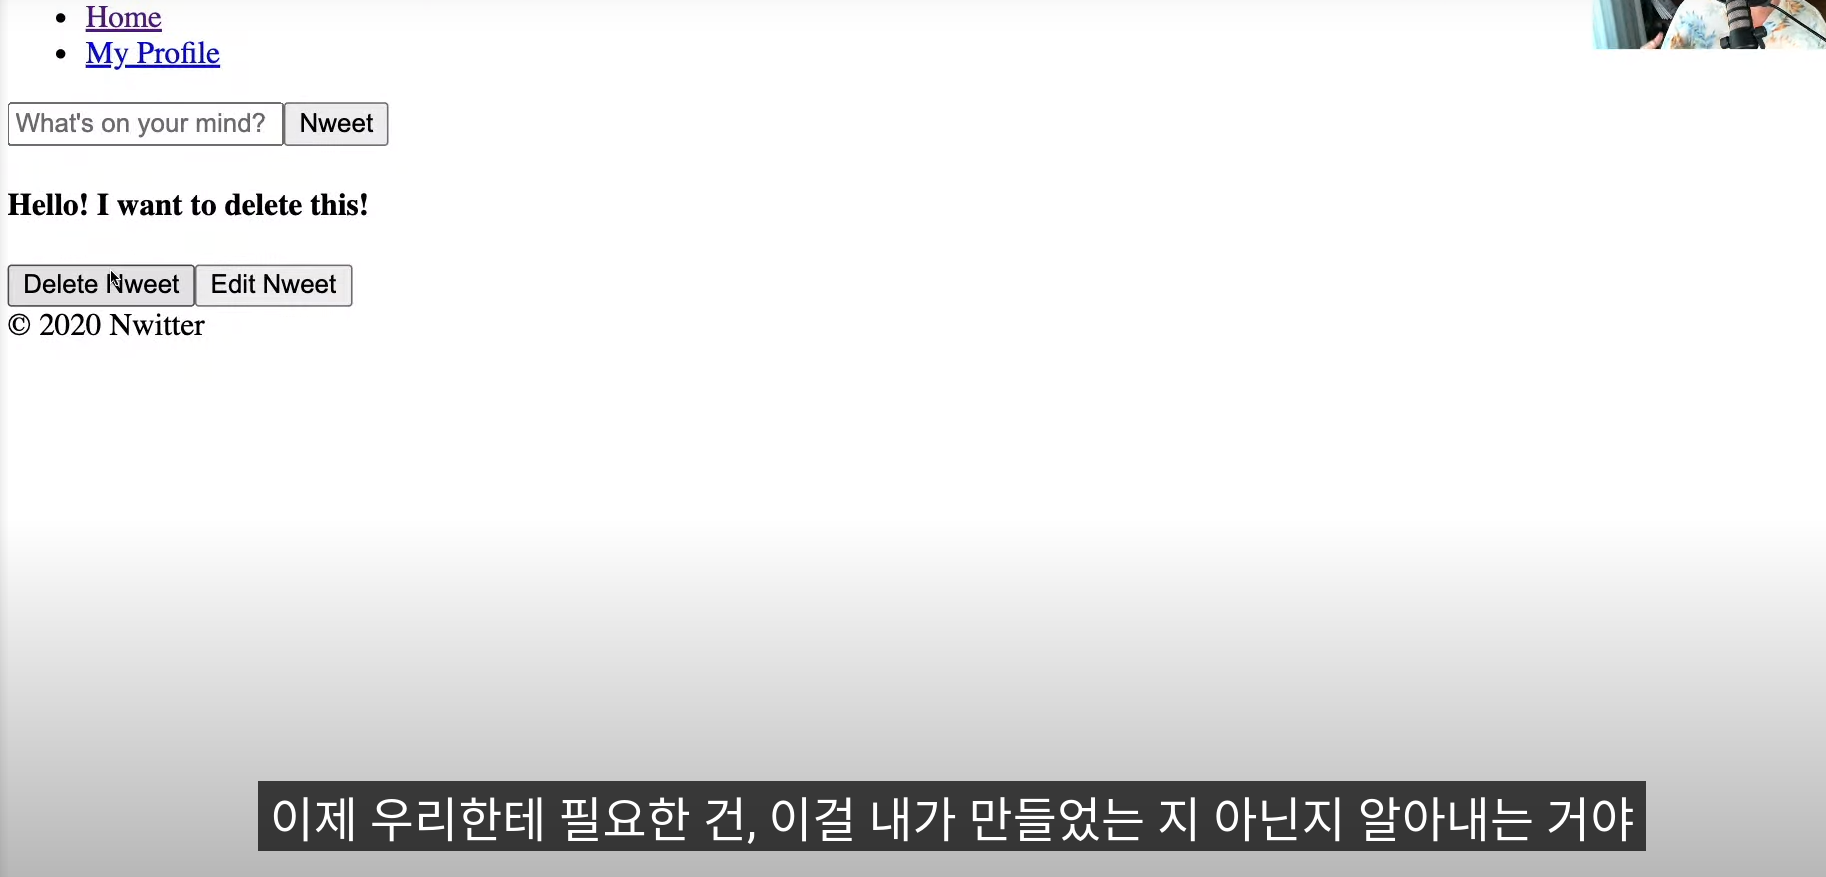

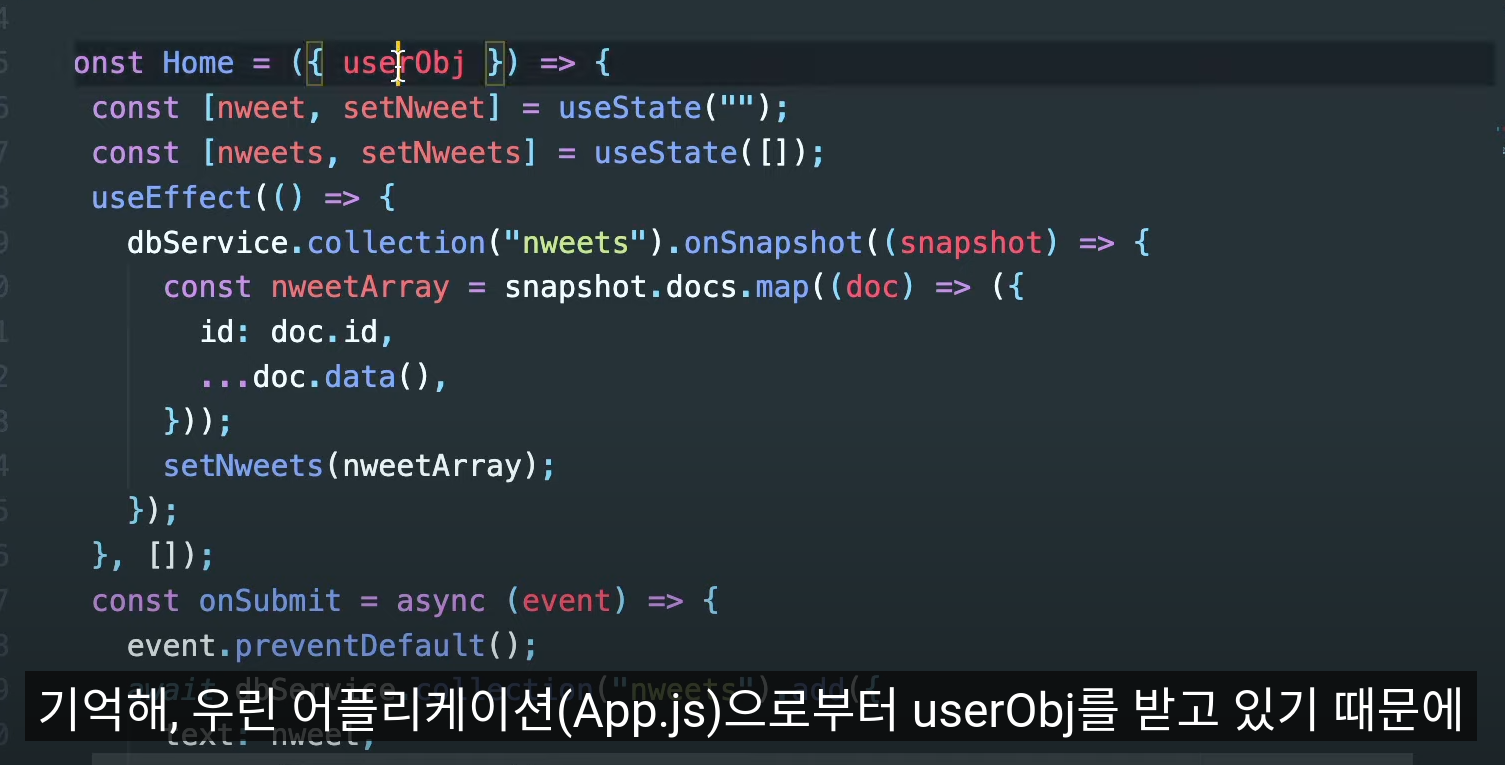

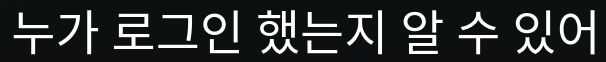

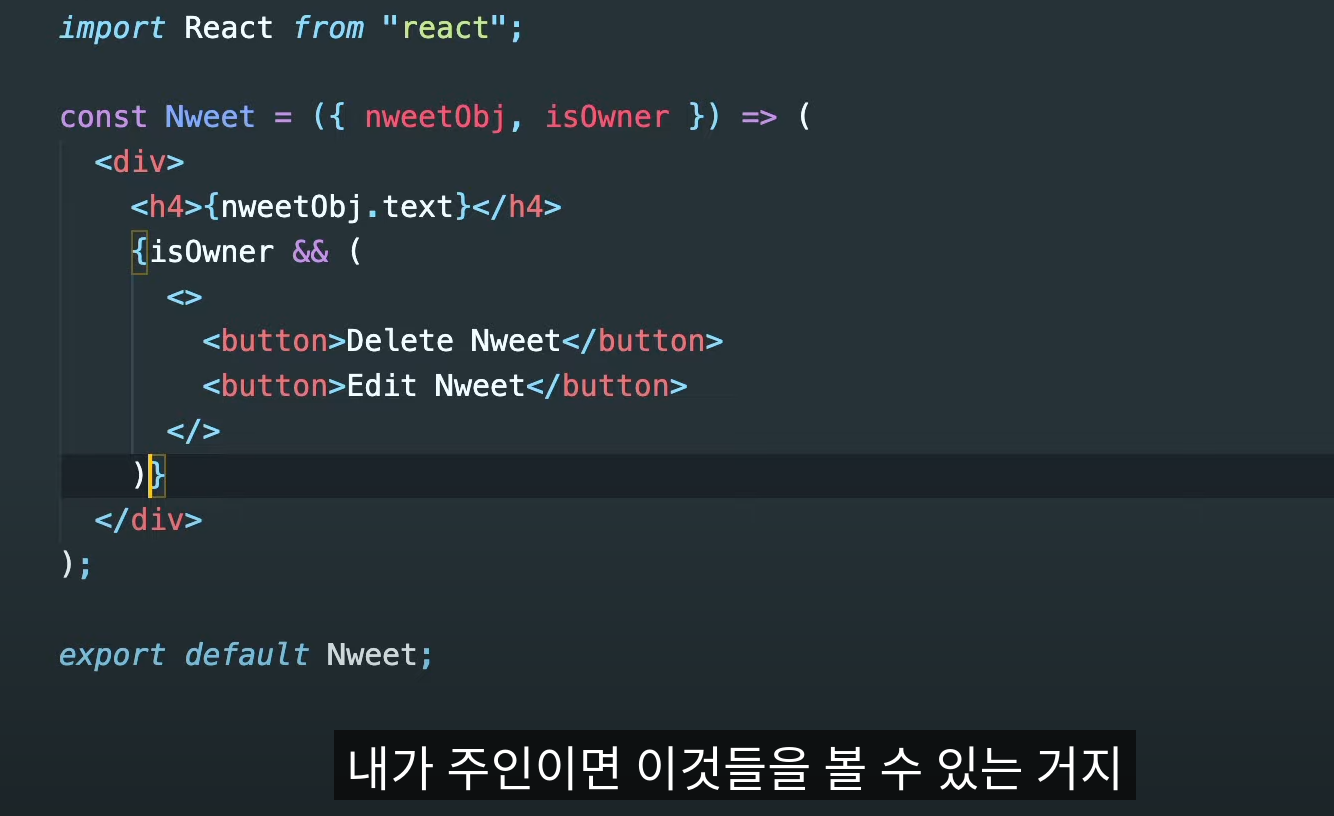

# Jweet.js
```jsx
function Jweet({ jweetObj, isOwner }) {
  return (
    <div>
      <h4>{jweetObj.text}</h4>
      {isOwner && (
        <>
          <button>Delete Jweet</button>
          <button>Edit Jweet</button>
        </>
      )}
    </div>
  );
}

export default Jweet;

```

# Home.js
```jsx
import { useState, useEffect } from "react";
// firestore - https://firebase.google.com/docs/firestore/quickstart?hl=ko#web-version-9
import {
  collection,
  addDoc,
  // getDocs,
  query,
  orderBy,
  onSnapshot,
} from "firebase/firestore";
import { dbService } from "fbase";
import Jweet from "components/Jweet";

function Home({ userObj }) {
  const [jweet, setJweet] = useState("");
  const [jweets, setJweets] = useState([]);

  useEffect(() => {
    // 실시간으로 데이터를 데이터베이스에서 가져오기
    const q = query(
      collection(dbService, "jweets"),
      // where('text', '==', 'hehe') // where뿐만아니라 각종 조건 이 영역에 때려부우면 됨
      orderBy("createdAt")
    );
    const unsubscribe = onSnapshot(q, (querySnapshot) => {
      const newArray = querySnapshot.docs.map((doc) => {
        return {
          id: doc.id,
          ...doc.data(),
        };
      });
      setJweets(newArray);
    });

    return () => {
      unsubscribe();
    };
  }, []);

  const onSubmit = async (event) => {
    event.preventDefault();
    if (!jweet) {
      return;
    }
    // 저장
    try {
      await addDoc(collection(dbService, "jweets"), {
        text: jweet,
        createdAt: Date.now(),
        creatorId: userObj.uid,
      });
    } catch (error) {
      console.log(error.message);
    }
    setJweet("");
  };

  const onChange = (event) => {
    const {
      target: { value },
    } = event;
    setJweet(value);
  };

  return (
    <>
      <form onSubmit={onSubmit}>
        <input
          type="text"
          placeholder="What's on your mind?"
          maxLength={120}
          onChange={onChange}
          value={jweet}
        />
        <input type="submit" value="Jweet" />
      </form>
      <div>
        {jweets.reverse().map((jweet) => {
          return (
            <Jweet
              key={jweet.id}
              jweetObj={jweet}
              isOwner={jweet.creatorId === userObj.uid}
            />
          );
        })}
      </div>
    </>
  );
}

export default Home;

```